$N_h=1000, \quad N_m=5000, \quad k\in[0.05, 0.2], \quad \beta=0.15, \quad \gamma\in[50,100], \quad \mu=100, \quad \eta\in[300, 350] $

In [ ]:
from ipywidgets.widgets import *
from matplotlib.pylab import *
from numpy import *
from scipy.integrate import odeint
print('Paqueterias listas')
 
#Valores de los parámetros
Nh=1000; Nm=5000; beta=0.15; mu=100

Paqueterias listas


Caso en el que el equilibrio infeccioso es estable y el no infeccioso inestable
---


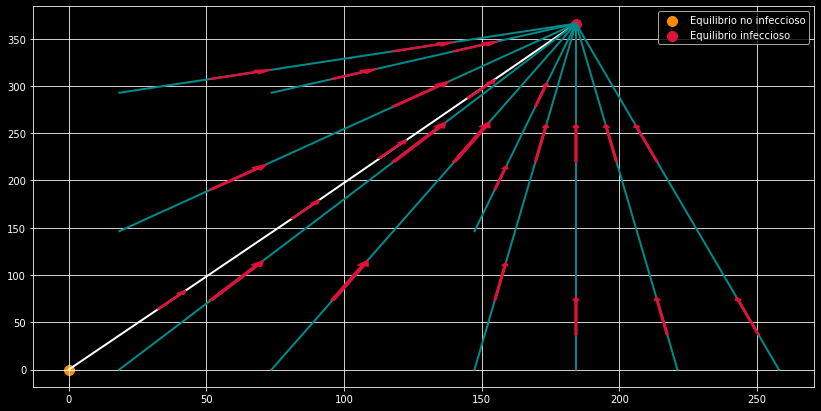

In [ ]:
#Valores
k=0.1; gamma=62; eta=350
r0=(k*beta*Nh*Nm)/(eta*(mu+gamma))

#Sistema 
def sistema(X,t):
  Ih, Im = X
  dIh= k*(Nh-Ih)*Im - (mu+gamma)*Ih
  dIm= beta*(Nm-Im)*Ih - eta*Im
  return [dIh, dIm]

#Valores puntos de equilibrio
xbar = (eta*(mu+gamma)*(r0-1))/(beta*(k*Nm+mu+gamma))
ybar = (Nm*(mu+gamma)*(r0-1))/(((mu+gamma)*r0)+(k*Nm))
 
#Gráfica
with style.context('dark_background'):
  fig = plt.figure(figsize=(14,7))
  grid()
  scatter([0], [0], s=100, color='darkorange', label='Equilibrio no infeccioso')
  scatter([xbar], [ybar], s=100, color='crimson', label='Equilibrio infeccioso')
  legend()

  #Solución  principal
  t = linspace(-5,1.2*ybar,2000)
  sol = odeint(sistema,[0.1,0.1],t)
  sol[isnan(sol)] = 0
  x,y=sol.T
  plot(x,y,'white', lw=2, zorder=1)
  arrow((x[0]+0.4*(x[1]-x[0])),(y[0]+0.4*(y[1]-y[0])),0.1*(x[1]-x[0]),0.1*(y[1]-y[0]), color='crimson', zorder=2, width=1)
  arrow((x[0]+(x[1]-x[0])),(y[0]+(y[1]-y[0])),0.1*(x[1]-x[0]),0.1*(y[1]-y[0]), color='crimson', zorder=2, width=1)
  arrow((x[0]+1.39*(x[1]-x[0])),(y[0]+1.4*(y[1]-y[0])),0.1*(x[1]-x[0]),0.1*(y[1]-y[0]), color='crimson', zorder=2, width=1)
  arrow((x[0]+1.79*(x[1]-x[0])),(y[0]+1.8*(y[1]-y[0])),0.1*(x[1]-x[0]),0.1*(y[1]-y[0]), color='crimson', zorder=2, width=1)

  t = linspace(-5,1000,3000)
  for i in range(3):
    sol = odeint(sistema,[xbar*(1+0.20*i) ,0],t)
    sol[isnan(sol)] = 0
    x,y=sol.T
    plot(x,y,'darkcyan', lw=2)
    arrow((x[0]-0.1*(x[0]-x[1])),(0.1*y[1]),0.1*(x[1]-x[0]),0.1*(y[1]-y[0]), color='crimson', zorder=2, width=0.8)
    arrow((x[0]-0.6*(x[0]-x[1])),(0.6*y[1]),0.1*(x[1]-x[0]),0.1*(y[1]-y[0]), color='crimson', zorder=2, width=0.8)

  for i in range(2):
    sol = odeint(sistema,[0.8*xbar , 0.4*ybar*i],t)
    sol[isnan(sol)] = 0
    x,y=sol.T
    plot(x,y,'darkcyan', lw=2)
    arrow((x[0]+0.2*(x[1]-x[0])),(y[0]+0.2*(y[1]-y[0])),0.1*(x[1]-x[0]),0.1*(y[1]-y[0]), color='crimson', zorder=2, width=0.8)
    arrow((x[0]+0.6*(x[1]-x[0])),(y[0]+0.6*(y[1]-y[0])),0.1*(x[1]-x[0]),0.1*(y[1]-y[0]), color='crimson', zorder=2, width=0.8)

  for i in range(2):
    sol = odeint(sistema,[0.4*xbar , 0.8*ybar*i],t)
    sol[isnan(sol)] = 0
    x,y=sol.T
    plot(x,y,'darkcyan', lw=2)
    arrow((x[0]+0.2*(x[1]-x[0])),(y[0]+0.2*(y[1]-y[0])),0.1*(x[1]-x[0]),0.1*(y[1]-y[0]), color='crimson', zorder=2, width=1.4)
    arrow((x[0]+0.6*(x[1]-x[0])),(y[0]+0.6*(y[1]-y[0])),0.1*(x[1]-x[0]),0.1*(y[1]-y[0]), color='crimson', zorder=2, width=1.4)

  for i in range(3):
    sol = odeint(sistema,[0.1*xbar , 0.4*ybar*i],t)
    sol[isnan(sol)] = 0
    x,y=sol.T
    plot(x,y,'darkcyan', lw=2)
    arrow((x[0]+0.2*(x[1]-x[0])),(y[0]+0.2*(y[1]-y[0])),0.1*(x[1]-x[0]),0.1*(y[1]-y[0]), color='crimson', zorder=2, width=1.4)
    arrow((x[0]+0.6*(x[1]-x[0])),(y[0]+0.6*(y[1]-y[0])),0.1*(x[1]-x[0]),0.1*(y[1]-y[0]), color='crimson', zorder=2, width=1.4)

Caso en el que sólo existe el equilibrio no infeccioso y es estable
---

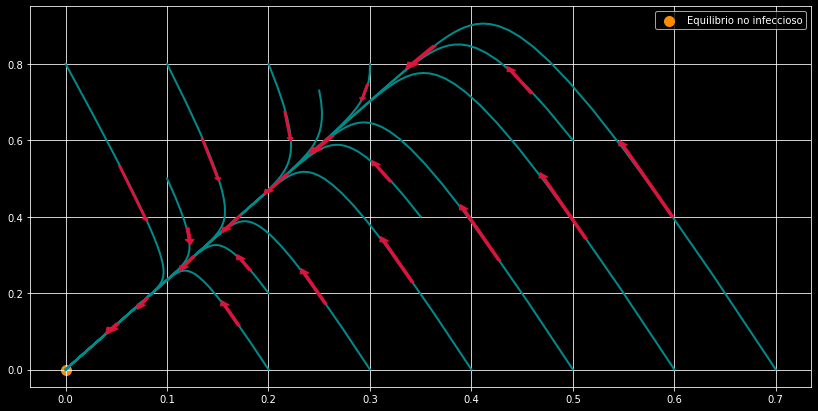

In [ ]:
#Valores
k=0.07; gamma=85; eta=341
r0=(k*beta*Nh*Nm)/(eta*(mu+gamma))

#Sistema 
def sistema(X,t):
  Ih, Im = X
  dIh= k*(Nh-Ih)*Im - (mu+gamma)*Ih
  dIm= beta*(Nm-Im)*Ih - eta*Im
  return [dIh, dIm]

with style.context('dark_background'):
  fig = plt.figure(figsize=(14,7))
  grid()
  scatter([0], [0], s=100, color='darkorange', label='Equilibrio no infeccioso')
  legend()

  t=linspace(-0.1,1,2000)
  for i in range(4):
    sol = odeint(sistema,[0.1*i,0.8],t)
    sol[isnan(sol)] = 0
    x,y=sol.T
    plot(x,y,'darkcyan', lw=2)
    arrow((x[2]+0.1*(x[7]-x[1])),(y[2]+0.1*(y[7]-y[1])),0.4*(x[7]-x[1]),0.4*(y[7]-y[1]), color='crimson', zorder=2, width=0.002)
    arrow((x[7]+1.8*(x[22]-x[9])),(y[7]+1.8*(y[22]-y[9])),0.7*(x[26]-x[17]),0.7*(y[26]-y[17]), color='crimson', zorder=2, width=0.003)

  for i in range(6):
    sol = odeint(sistema,[0.1+0.1*(i+1),0],t)
    sol[isnan(sol)] = 0
    x,y=sol.T
    plot(x,y,'darkcyan', lw=2)
    arrow((x[1]+0.22*(x[7]-x[1])),(y[1]+0.25*(y[7]-y[1])),(x[2]-x[1]),(y[2]-y[1]), color='crimson', zorder=2, width=0.003)
    if i==5:
      arrow((x[21]),(y[21]),(x[26]-x[21]),(y[26]-y[21]), color='crimson', zorder=2, width=0.004)
      arrow((x[190]),(y[190]),(x[175]-x[168]),(y[175]-y[168]), color='crimson', zorder=2, width=0.004)
    if i==3:
      arrow((x[20]),(y[20]),(x[26]-x[21]),(y[26]-y[21]), color='crimson', zorder=2, width=0.004)

  for i in range(3):
    sol = odeint(sistema,[0.2+0.15*i,0.2+0.2*i],t)
    sol[isnan(sol)] = 0
    x,y=sol.T
    plot(x,y,'darkcyan', lw=2)
    arrow((x[1]+0.2*(x[7]-x[1])),(y[1]+0.25*(y[7]-y[1])),(x[2]-x[1]),(y[2]-y[1]), color='crimson', zorder=2, width=0.003)
    
  for i in range(2):
    sol = odeint(sistema,[0.1+0.15*i,0.5+0.23*i],t)
    sol[isnan(sol)] = 0
    x,y=sol.T
    plot(x,y,'darkcyan', lw=2)
    if i==0:
      arrow((x[0]+1.4*(x[7]-x[1])),(y[0]+(y[7]-y[1])),0.4*(x[8]-x[3]),0.4*(y[8]-y[3]), color='crimson', zorder=2, width=0.003)